<a href="https://colab.research.google.com/github/Aravindkaturi/AIML-lab/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment_7**

**Name:- K.Aravind**

**HTNO:- 2203A51140**

**Lab:- AIML**

**Date :- 13-03-2024**

1. Import the Libraries required for SVM

Import all libraries required along with visualization to completed the task on SVM

In [2]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

2. Import the Breast Cancer Dataset from Sklearn Packages

• Once downloaded the Breast Cancer data, prepare the dictionary format to access the
data using its keys.

• Describe all the features from the dictionary, feature names.

• Setup the dataframe , describe itd details, check for missing values.

• Identify the target class and assign it to the dataframe.

• Perform exploratory analysis of dataframe using seabon - sns package

• the Draw the boxplot of first 10 columns to verify their role in cancer.

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothne

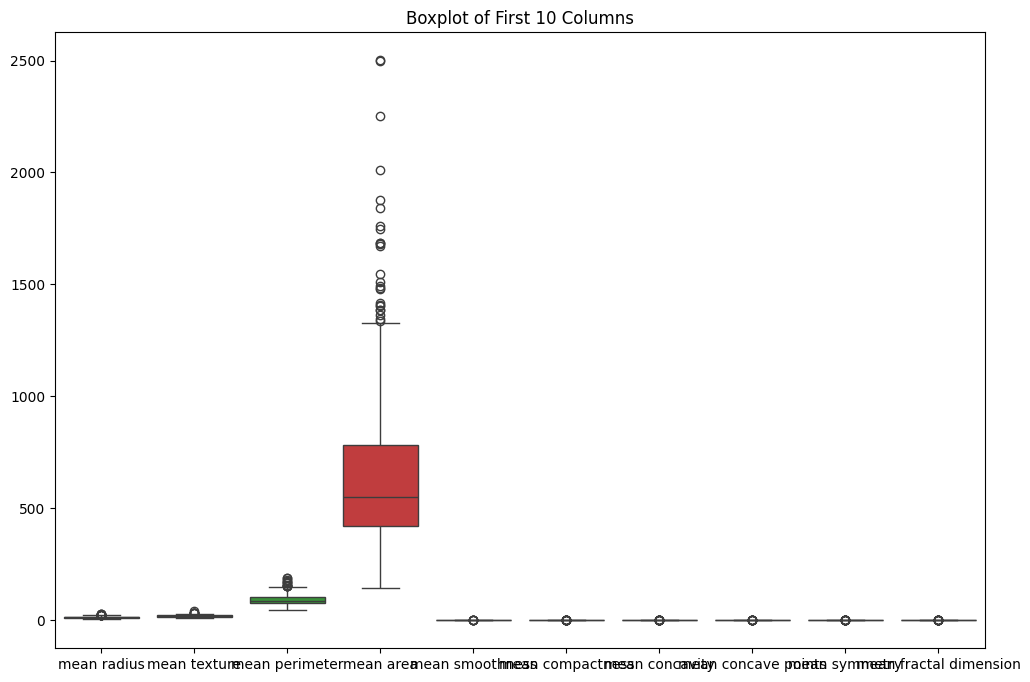

In [3]:
# 2. Import Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Prepare dictionary format
cancer_dict = {name: feature for name, feature in zip(data.feature_names, X.T)}
# Describe features
print("Feature Names:")
print(data.feature_names)

# Setup DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Explore DataFrame
print("DataFrame Details:")
print(df.describe())

# Draw boxplot of first 10 columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :10])
plt.title("Boxplot of First 10 Columns")
plt.show()

3. Train and Test Data

• Prepare the Train and Test data from the dataframe.

• Drop the cancer columns and define the dataframe with only target results

• Split the data into train, test using train test split

In [4]:
# 3. Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Train the SVC using the Train Dataset

• import sklearn.svm import SVC

• Apply the model.fit to dataset

In [5]:
# 4. Train the SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

5. Predict and Analysis the Performance of the SVC Model

• Apply model.predict(X test)

• Generate the classification report, confusion matrix using sklearn.metrics

In [6]:
# 5. Predict and Analyze Performance
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[37  6]
 [ 0 71]]


6. Improve the Accuracy of Model using GridSearchCV Model

• Given the following parameters validate the GridSearchCV Model:
param grid = ’C’: [0.1,1, 10, 100, 1000], ’gamma’: [1,0.1,0.01,0.001,0.0001],
’kernel’: [’rbf’]
• Implement the model.predict

• Generate the classification report, confusion matrix using sklearn.metrics

In [7]:
# 6. Improve Accuracy using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
# Best parameters
print("Best Parameters:", grid.best_params_)

# Predict using the best model
y_pred_grid = grid.predict(X_test)

# Performance Analysis
print("Classification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix (GridSearchCV):")
print(confusion_matrix(y_test, y_pred_grid))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf